In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
for layer in vgg.layers:
  layer.trainable = False

In [4]:
x = Flatten()(vgg.output)
x = Dense(512, activation='relu', name='fc')(x)
prediction = Dense(46, activation='softmax', name='prediction')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [5]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    #validation_split=0.2
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('Datasets/dataset_80_10_10/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')
validation = test_datagen.flow_from_directory('Datasets/dataset_80_10_10/validation', 
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2128 images belonging to 46 classes.
Found 266 images belonging to 46 classes.


In [11]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
67/67 [==============================] - 27s 400ms/step - loss: 4.4930 - accuracy: 0.1414 - val_loss: 2.6639 - val_accuracy: 0.4173
Epoch 2/20
67/67 [==============================] - 17s 258ms/step - loss: 2.1450 - accuracy: 0.4981 - val_loss: 1.5272 - val_accuracy: 0.6805
Epoch 3/20
67/67 [==============================] - 17s 255ms/step - loss: 1.2555 - accuracy: 0.7218 - val_loss: 1.1407 - val_accuracy: 0.7030
Epoch 4/20
67/67 [==============================] - 17s 259ms/step - loss: 0.7955 - accuracy: 0.8219 - val_loss: 0.8166 - val_accuracy: 0.7970
Epoch 5/20
67/67 [==============================] - 17s 257ms/step - loss: 0.5559 - accuracy: 0.8853 - val_loss: 0.6766 - val_accuracy: 0.8195
Epoch 6/20
67/67 [==============================] - 18s 271ms/step - loss: 0.3945 - accuracy: 0.9281 - val_loss: 0.6726 - val_accuracy: 0.8346
Epoch 7/20
67/67 [==============================] - 18s 268ms/step

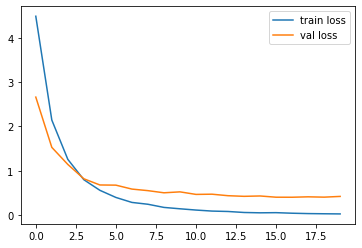

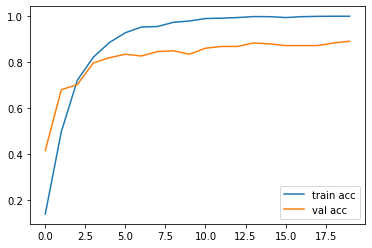

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
test = test_datagen.flow_from_directory('Datasets/dataset_80_10_10/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
X_test,y_test=test.next()

Found 266 images belonging to 46 classes.


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 160ms/step - loss: 0.3938 - accuracy: 0.8750
